In [1]:
import os
import tarfile
import urllib

In [2]:
print(os.getcwd())

/Users/bhuvanshree/ml/ml_projects


In [3]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

/var/folders/54/d7crf34x0t36876j4rghm2zw0000gn/T/ipykernel_84489/26878354.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path = housing_path)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.shape

(20640, 10)

In [10]:
    housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

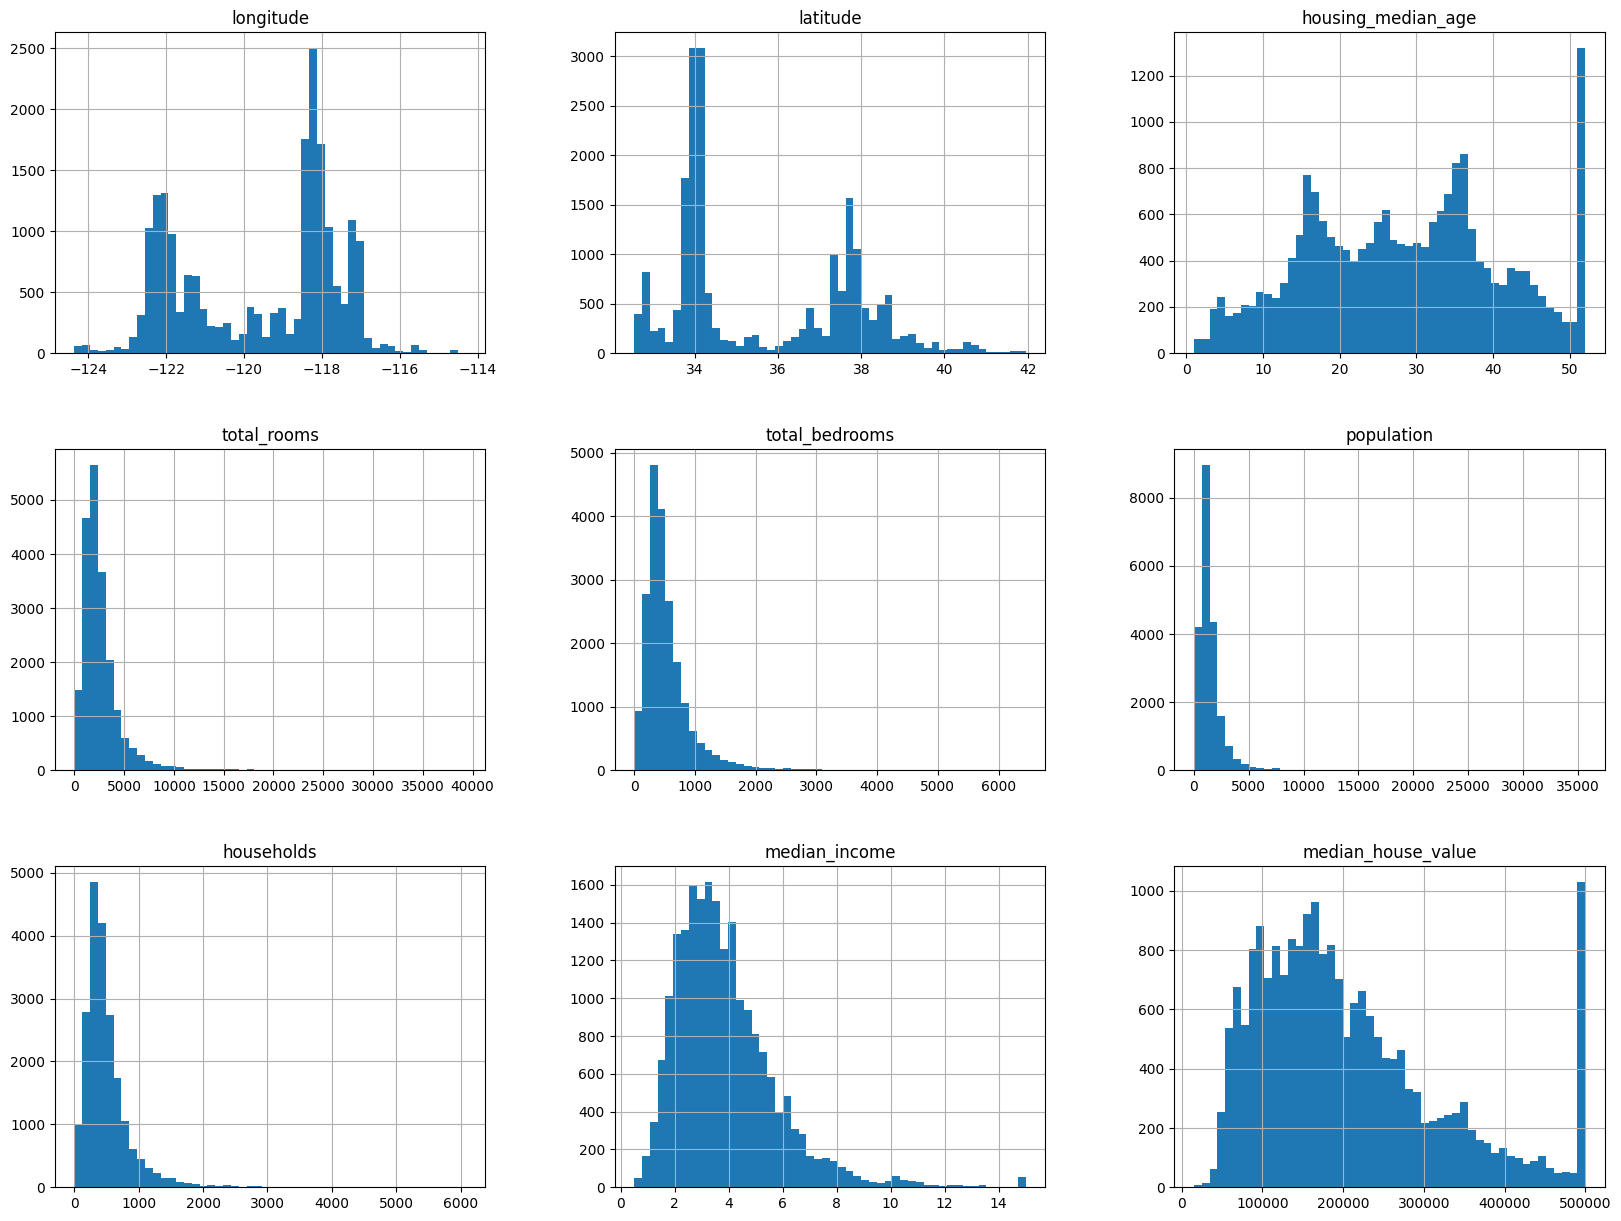

In [13]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

 ### DATA SNOOPING BIAS
      Its like giving test answers to the model before the test
      Data snooping bias (also called data leakage or look-ahead bias) occurs when you use information from outside the training dataset — often   from the test set or future data — to influence your model or analysis.

    This leads to overly optimistic results and poor real-world performance because the model has "seen" data it shouldn't have during  training.

#### To avoid this lets split the test data first and keep it aside

In [15]:

test_size_ratio = 0.2
shuffled_indices = np.random.permutation(len(housing))
test_size = int(len(housing) * test_size_ratio)
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]
train_set = housing.iloc[train_indices]
test_set = housing.iloc[test_indices]


In [16]:
shuffled_indices

array([ 6073, 11019, 17819, ..., 19744, 20623,  9868])

In [17]:
train_set.shape

(16512, 10)

In [18]:
test_set.shape

(4128, 10)

    so in this case for every run even though if the size of train test data are constant with the ration 80-20 the data changes this affects the training of model as we are using random shuffler for picking the indices

In [20]:
def split_train_test_data(data,test_size_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_size_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
  

In [21]:
train_data,test_data = split_train_test_data(housing,0.2)

In [22]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [23]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


    so when i set the random state to a constant number the random genertaor always generates a same set of random indices 

### Sci kit learn has similar simple function

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [28]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [29]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


    But sampling randomly some times may cause sampling bias, startified sampling helps overcome this 

In [31]:
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

<Axes: >

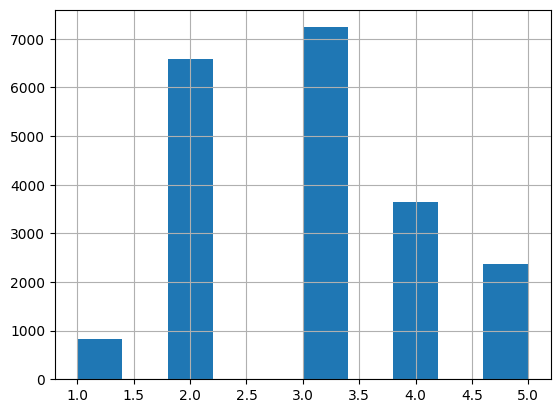

In [32]:
housing["income_cat"].hist()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

In [34]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2,random_state = 42)

In [35]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [36]:
strat_train_set['income_cat'].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [37]:
strat_test_set['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

### generates category proportion more similar to actual data set
     now we can drop the income cat variable
     

In [39]:
for sets in (strat_train_set,strat_test_set):
    sets.drop('income_cat',axis=1,inplace=True)

In [40]:
housing_train = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

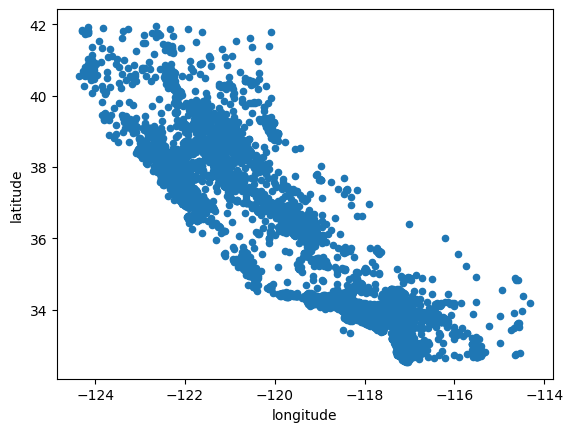

In [41]:
housing_train.plot(x="longitude", y="latitude", kind = "scatter")

<Axes: xlabel='longitude', ylabel='latitude'>

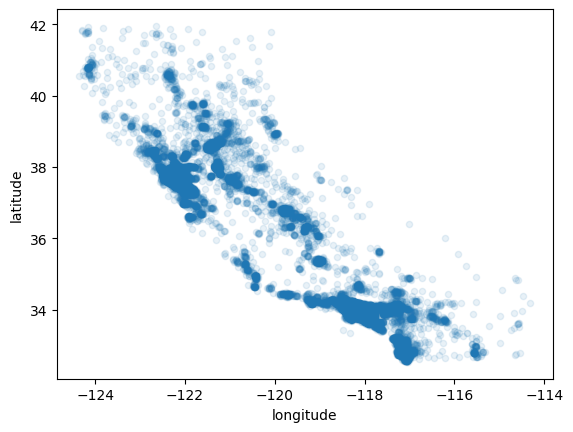

In [42]:
housing_train.plot(x="longitude", y="latitude", kind = "scatter",alpha=0.1) #to check highly densed places alpha =0.1

    size is set to population , color is set to house price

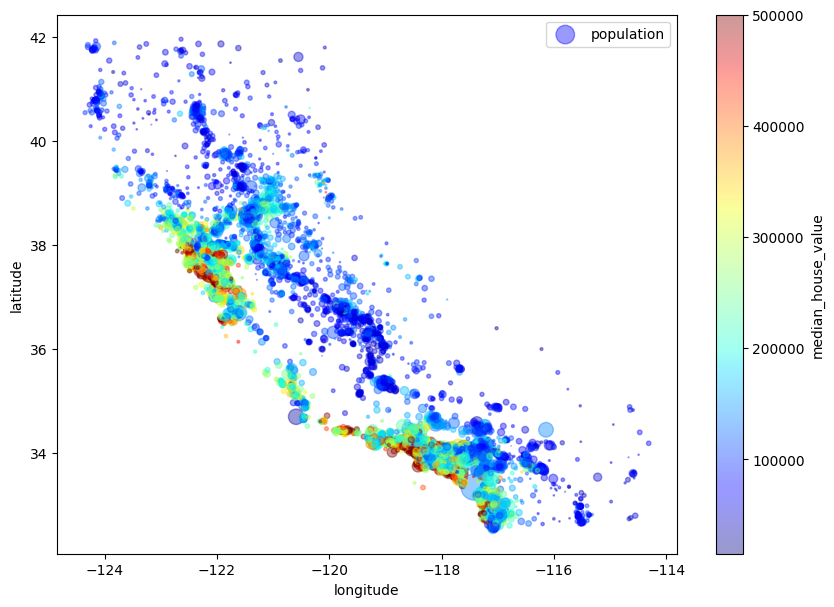

In [44]:
housing_train.plot(x="longitude", y="latitude", kind = "scatter",alpha=0.4,s=housing_train["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### Finding correlations

In [46]:
housing_num = housing_train.select_dtypes(include =['number'])
corr_matrix = housing_num.corr()

In [47]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [48]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [49]:
from pandas.plotting import scatter_matrix

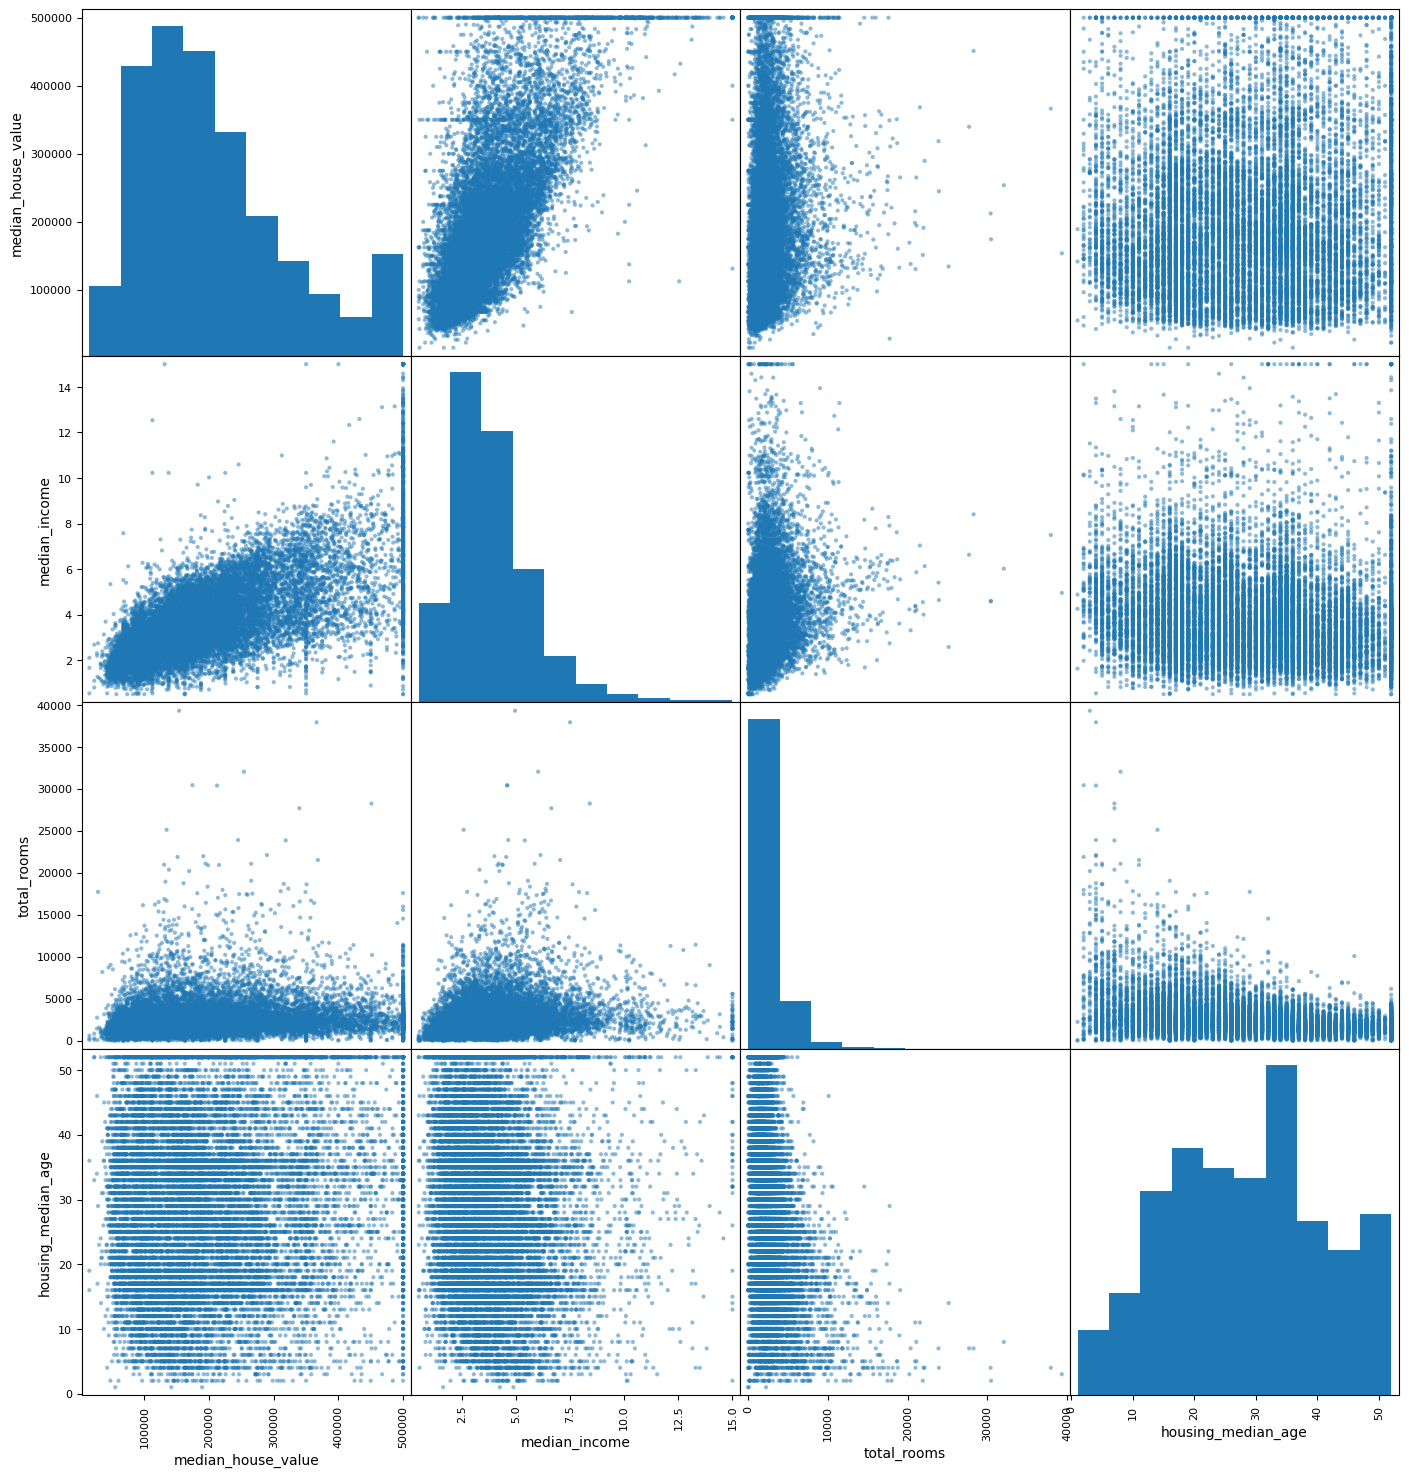

In [50]:
key_col = ['median_house_value','median_income',"total_rooms","housing_median_age"]
scatter_matrix(housing_train[key_col],figsize=(17,18))
plt.show()

#### Extracting some meaningful features

In [52]:
housing_train['total_rooms_per_household'] = housing_train['total_rooms']/housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms'] / housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population']/housing['households']

In [53]:
housing_num = housing_train.select_dtypes(include =['number'])
corr_matrix = housing_num.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value           1.000000
median_income                0.687151
total_rooms_per_household    0.146255
total_rooms                  0.135140
housing_median_age           0.114146
households                   0.064590
total_bedrooms               0.047781
population_per_household    -0.021991
population                  -0.026882
longitude                   -0.047466
latitude                    -0.142673
bedrooms_per_room           -0.259952
Name: median_house_value, dtype: float64

#### DATA CLEANING

In [55]:
housing = strat_train_set.drop('median_house_value',axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


In [57]:
housing.total_bedrooms.isna().sum()

158

In [58]:
housing_num = housing.select_dtypes(include =['number'])

### Scikit-learn Design

#### Estimator

1. **`fit()`**
    - `fit()` learns from the data — it identifies patterns in the data.
    - It does **not** return results; it only **learns and stores parameters**.
    - Used by models (like `LinearRegression`) and preprocessing tools (like scalers).
    
    Example:
    ```python
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit([[1], [2], [3], [4]], [2, 4, 6, 8])  # The model learns that y ≈ 2 * x
    ```

2. **`transform()`**
    - Applies the learned patterns to new data.
    - Mostly used by preprocessing tools like scalers.
    - It **does not learn**, just **applies** what was learned during `fit()`.
    - Used for **feature transformation**, not for prediction.

      Example:
      ```python
      from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaler.fit([[10], [20], [30]]) # Learns mean=20, std≈8.16
        print(scaler.mean_) # [20.0]
        X_scaled = scaler.transform([[20]]) # Apply scaling to a value of 20
        print(X_scaled) # [[0.0]] since (20-20)/8.16 = 0
      ```
      
3. **`predict()`**
    - Used by models to make predictions on new data.
    - It applies the patterns learned from `fit()` to return predicted outcomes.

      Example:
      ```python

       from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit([[1], [2], [3], [4]], [2, 4, 6, 8]) # learn y = 2*x
        print(model.predict([[5]])) # Output: [10.0], since 2*5 = 10
      ```

      
4. **`fit_transform()`**
    - Combines `fit()` and `transform()` in one step.
    - Commonly used in data preprocessing to learn and apply transformations in one call.

    Example:
    ```python
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform([[1], [2], [3], [4]])
    ```


In [60]:
from sklearn.impute import SimpleImputer

In [61]:
imputer = SimpleImputer(strategy = "median")

In [62]:
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [63]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [64]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns ,index = housing_num.index)

In [65]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [66]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [67]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


    Categorical values must me encoded as only numerical values can be trained in the ML model, to convert categorical values to numerical Encoding techniques can be used.
    1. Ordinal Encoder
    2. One Hot Encoder

#### Ordinal Encoder

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [72]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [73]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

    Ordinal encoding is ordered so for unordered categories Model may assume some fake patterns and predict wrong values so one hot encoding is a better option for unordered categorical values

#### One Hot Encoder

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
hot_encoder = OneHotEncoder()
housing_cat_hot_encoded = hot_encoder.fit_transform(housing_cat)
housing_cat_hot_encoded = housing_cat_hot_encoded.toarray()

    * One hot encoder returns compressed sparse matrix, its better to convert it to ndarray

In [79]:
housing_cat_hot_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [80]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

    But for large number of categories one hot encoding may occupy large space in that case embedding may help

### Custom Transformers

1. In Scikit-Learn, transformers are components that modify or preprocess your data — usually as a step in a machine learning pipeline.

2. Custom transformers are user-defined classes that perform specific data transformations not already provided by Scikit-Learn’s built-in tools

    Custom Transformer Blueprint:

    ```python

    from sklearn.base import BaseEstimator, TransformerMixin

    class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, param1=True):
        self.param1 = param1  # Save parameters

    def fit(self, X, y=None):
        # No fitting needed? Just return self
        return self

    def transform(self, X):
        # Apply transformation logic to X
        return modified_X
    ```


    

In [83]:
from sklearn.base import BaseEstimator,TransformerMixin

In [84]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [85]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
         population_per_household = X[:, population_ix] / X[:, households_ix]
         if self.add_bedrooms_per_room == True:
             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
             return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
         else:
             return np.c_[X, rooms_per_household, population_per_household]


        

In [86]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [87]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [88]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

### Feature Scaling

- Getting all features in same scale
  1. Min Max Scaling
     scaled_value = value - min / (max - min) --> ranges between 0 and 1 (scikit - Minmaxscaler has hyper parameter feature_range where 0-1 range can be modified)
  2. Standardization
        scaled_value = value - mean /SD --> No range bound not affected by outliers
  

### Transformation Pipelines

- Transformation pipelines are there to order the data processing steps.

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [92]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [93]:
from sklearn.compose import ColumnTransformer

In [94]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [197]:
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),("cat",OneHotEncoder(handle_unknown="ignore"),cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)


In [199]:
housing_prepared[0,:]

array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
       -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

### BUILD A PREDICTION MODEL

In [201]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [205]:
some_data = housing.iloc[:5]
some_label_data = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared
print('predicted values', lin_reg.predict(some_data_prepared))
print('label values', some_label_data)

predicted values [ 86208. 304704. 153536. 185728. 244416.]
label values 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


### Compute RMSE

In [211]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

so its clear that its not overfit, but also at the same time 68633 as a error value is a big difference and the model is definitely under fit.

Lets try out some other models.
#### Decision Tree Regressor

In [219]:
from sklearn.tree import DecisionTreeRegressor

In [221]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [223]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The rmse value is 0 which doesnt mean its the perfect model it can be overfit also to check this we can do the cross validation to check if this model is better or not

### Cross Validation
    spliting the training data to multiple parts and training on some portion of parts and keeping a portion for testing and repating it for all partitions and evaluating the cross validation score check if the model performing well on unseen data without exposing test set 
    

In [236]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
scores_rmse = np.sqrt(-scores)
scores_rmse

array([73429.3428801 , 69371.88966507, 68169.16873936, 71116.98145256,
       71574.95662696, 77032.24364463, 71503.43634408, 73229.45903738,
       67521.04502074, 71179.73507481])

We calculate the negative mean error because cross validation expects utility function means higher the value better the model gives better the score but mse is a cost function means lower is better so this may cause confusion so we are using the flip the sign trick to let the cross validator work as usual without any function misconspiracies

In [238]:
scores_rmse.mean()

71412.8258485678

In [248]:

lin_scores = cross_val_score(lin_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_scores_rmse = np.sqrt(-lin_scores)
lin_scores_rmse

array([71800.38078269, 64114.99166359, 67844.95431254, 68635.19072082,
       66801.98038821, 72531.04505346, 73992.85834976, 68824.54092094,
       66474.60750419, 70143.79750458])

In [250]:
lin_scores_rmse.mean()

69116.4347200802

The RMSE of decision tree is worse than linear model

### Random Tree Regressor

In [255]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)


RandomForestRegressor()

In [265]:
housing_predictions_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18742.37836373447

In [257]:

forest_scores = cross_val_score(forest_reg, housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)
forest_scores_rmse

array([51133.46126458, 49019.49649454, 46719.92942512, 51901.33214029,
       47406.84470863, 51696.31962958, 52804.39840448, 49500.12197745,
       48232.36035473, 54066.5877196 ])

In [261]:
forest_scores_rmse.mean()

50248.085211900456

This is much better than other models but there is chance of over fitting beacause rmse of train set is 18k but on validation its is around 50k so definitely its over fitting

In [279]:
from sklearn.model_selection import GridSearchCV

In [283]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [285]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [287]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [293]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63547.83998174959 {'max_features': 2, 'n_estimators': 3}
55329.57615729314 {'max_features': 2, 'n_estimators': 10}
52559.088746256064 {'max_features': 2, 'n_estimators': 30}
60097.91372920225 {'max_features': 4, 'n_estimators': 3}
52850.22738494273 {'max_features': 4, 'n_estimators': 10}
50321.68895679803 {'max_features': 4, 'n_estimators': 30}
59016.44832606656 {'max_features': 6, 'n_estimators': 3}
52205.410287959676 {'max_features': 6, 'n_estimators': 10}
49777.44609490377 {'max_features': 6, 'n_estimators': 30}
58578.34123737095 {'max_features': 8, 'n_estimators': 3}
51658.28997143782 {'max_features': 8, 'n_estimators': 10}
50129.90671239593 {'max_features': 8, 'n_estimators': 30}
61502.76726265248 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54329.08959784522 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59836.20995592052 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52596.24287515752 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

### Evaluate System on Test Set

In [298]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis =1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(x_test_prepared)
final_predictions

array([468047.2       , 263160.1       , 220600.        , ...,
       357546.76666667, 252026.7       , 229906.66666667])

In [300]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48566.824142337086

In [268]:
import joblib

In [272]:
joblib.dump(forest_reg,'forest_reg.joblib')
joblib.dump(lin_reg,'lin_reg.joblib')
joblib.dump(tree_reg,'tree_reg.joblib')

['tree_reg.joblib']